## TSP (Traveling Salesman Problem)

Jeder Ort soll einmal besucht werden. Die gesamte Reisestrecke 
 soll möglichst kurz sein und am Ende soll der Handlungsreisenden wieder am Ausgangsort ankommen.
 
TSP ist NP-vollständig, d.h. es wird vermutlich keinen polynomiellen Lösungsalgorithmus geben.

Es gibt viele Näherungsverfahren. In dem __[Video](https://www.youtube.com/watch?v=SC5CX8drAtU)__ werden 3 Verfahren präsentiert:

- Greedy
- 2-Opt
- Simulated Annealing

Testdaten für eigene Versuche gibt es z.B. __[hier](http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/)__

#### Greedy
__[code](./tsp_greedy_berlin52.py)__

Vom Startpunkt aus wird immer die am nächsten gelegene Stadt besucht, die noch nicht besucht wurde. 

Die beste Rundreise für berlin52 hat die Länge 7542.
Bei Startpunkt 20 benötigt greedy 10298.

<img src="./img/tsp1.png" width="600"/> 

Bei Startpunkt 39 benötigt greedy 8181.

<img src="./img/tsp2.png" width="600"/> 

### Greedy + 2opt
__[code](./tsp_2opt_berlin52.py)__

Mit dem 2opt-Algorithmus werden Kreuzungen eines Greedy-Ergebnisses eliminiert. Zu je zwei nicht benachbarten Orten wird überprüft, ob die Rundreise kürzer wird, wenn diese Orte benachbart wären.

```
def swap(tour,i,j):
     w1 = tour[:i] 
     w2 = [tour[i],tour[j]]
     w3 = tour[j-1:i:-1]  
     w4 = tour[j+1:] 
     return w1 + w2 + w3 + w4 
```

<img src="./img/swap1.png" width="700"/> 

Bei Startpunkt 44 benötigt greedy zusammen mit 2-opt 7657

<img src="./img/tsp3.png" width="601"/> 

### Simulated Annealing

__[code](./tsp_anneal_berlin52.py)__

```
Starte mit einer vorläufigen Lösung
Wiederhole sehr oft:
    Erniedrige die Temperatur ein bisschen
    Mache einen zufälligen swap
    Falls die Rundreise kürzer wird, 
        akzeptiere die Änderung
    sonst
        akzeptiere die Änderung mit einer gewissen Wahrscheinlichkeit
        (die mit sinkender Temperatur abnimmt)
    


```

Bei hoher Temperatur ist das Verhalten wie ein 'random walk', bei niedriger wie ein 'hill climbing'.

Mit Startpunkt 0 und random.seed(40) findet Simulated Annealing einen optimalen Weg



<img src="./img/tsp4.png" width="600"/> 

In [1]:
def swap(tour,i,j):
    w1 = tour[:i] 
    w2 = [tour[i],tour[j]]
    w3 = tour[j-1:i:-1]  
    w4 = tour[j+1:] 
    return w1 + w2 + w3 + w4

def neighbor(tour):
    i,j = sorted(random.sample(range(len(tour)),2))
    return swap(tour,i,j)

def anneal(tour):
    best_dist = dist(tour)
    best_tour = tour[:]
    T = 100
    T_min = 0.0005
    alpha = 0.995
    H = 125     #  bei gleicher Temperatur wird so oft probiert.
    while T > T_min:
        for i in range(H):
            new_tour = neighbor(best_tour)  # zufälliger swap
            new_dist = dist(new_tour)
            if (new_dist < best_dist):
                best_tour = new_tour[:]
                best_dist = new_dist
            elif (new_dist > best_dist):
                loss = new_dist - best_dist
                if random.random() <=  math.exp(-loss/T):
                    best_tour = new_tour[:]
                    best_dist = new_dist
 
        T = T*alpha
    return best_tour 

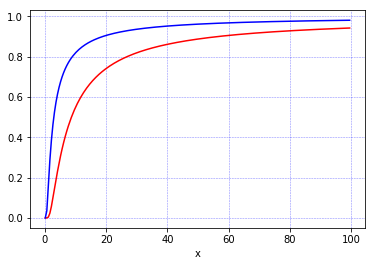

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.arange(0.1, 100, 0.5)

plt.plot(x, math.e**(-6/x), 'red')      # loss 6
plt.plot(x, math.e**(-2/x), 'blue')     # loss 2
plt.xlabel("x")
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()